# Scraping the MTA's ridership page
This project is a part of my Data Studio class at Columbia Journalism School, where I'm getting my M.S. in Data Journalism.
More projects can be found at sawy
<hr>

## Importing the essentials

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import numpy as np

import re
import requests

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 102})
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

## Scraping the annual ridership
`http://web.mta.info/nyct/facts/ridership/ridership_sub_annual.htm`

In [3]:
## Grabbing the website's numbers and throwing it into a dataframe

response = requests.get("http://web.mta.info/nyct/facts/ridership/ridership_sub_annual.htm")
doc = BeautifulSoup(response.text)

stations = []
lines = ""
for row in doc.find_all("tr")[4:]:
    station = {}
    total = ""
    try:
        
        station['Station'] = row.find_all("td")[0].text.strip()
        
        ## Grabbing the lines by using the .pngs 
        try: 
            for pic in row.find("td").find("div").find_all("img"):
                one = pic['alt'].split(" ")[0]
                total = total + one
                station['lines'] = total
        except:
            pass

        station['2013'] = row.find_all("td")[1].text
        station['2014'] = row.find_all("td")[2].text
        station['2015'] = row.find_all("td")[3].text
        station['2016'] = row.find_all("td")[4].text
        station['2017'] = row.find_all("td")[5].text
        station['2018'] = row.find_all("td")[6].text.strip()
        station['Rank'] = row.find_all("td")[9].text
        station['Borough'] = row.find_previous("td", colspan="10").text
        
        stations.append(station)
    except: pass
    
df = pd.DataFrame(stations, columns=['Station','lines','Borough','Rank','2013','2014','2015','2016','2017','2018'])
df = df.dropna()

## Changing the numbers to actual numbers
cols = ['2013', '2014','2015','2016','2017','2018']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
df.Rank = df.Rank.astype(int)

## getting the change from 2017 to 2018
def get_change(x):
    return x['2018'] - x['2017']
df['17-18 change'] = df.apply(get_change, axis=1)

## Cleaning it up a bit
df['Station'] = df['Station'].str.replace(r" ","", regex=True)
df['Station'] = df['Station'].str.replace("\n","")

## Kicking it to a .csv
df.to_csv('data/scraped_subway_ridership.csv', index=False)

df.head()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018,17-18 change
0,138St-GrandConcourse,45,The Bronx,365,957984.0,1033559.0,1056380.0,1070024.0,1036746.0,944598,-92148.0
1,149St-GrandConcourse,245,The Bronx,121,4427399.0,4536888.0,4424754.0,4381900.0,4255015.0,3972763,-282252.0
2,161St-YankeeStadium,BD4,The Bronx,38,8766012.0,8961029.0,8922188.0,8784407.0,8596506.0,8392290,-204216.0
3,167St,4,The Bronx,165,3081534.0,3067345.0,3180274.0,3179087.0,2954228.0,2933140,-21088.0
4,167St,BD,The Bronx,231,3091289.0,3245977.0,3295032.0,3365748.0,3293451.0,2022919,-1270532.0


In [4]:
## reading the .csv in to save some time
df = pd.read_csv('data/scraped_subway_ridership.csv')
df.head()

,Station,lines,Borough,Rank,2013,2014,2015,2016,2017,2018,17-18 change
0,138St-GrandConcourse,45,The Bronx,365,957984.0,1033559.0,1056380.0,1070024.0,1036746.0,944598,-92148.0
1,149St-GrandConcourse,245,The Bronx,121,4427399.0,4536888.0,4424754.0,4381900.0,4255015.0,3972763,-282252.0
2,161St-YankeeStadium,BD4,The Bronx,38,8766012.0,8961029.0,8922188.0,8784407.0,8596506.0,8392290,-204216.0
3,167St,4,The Bronx,165,3081534.0,3067345.0,3180274.0,3179087.0,2954228.0,2933140,-21088.0
4,167St,BD,The Bronx,231,3091289.0,3245977.0,3295032.0,3365748.0,3293451.0,2022919,-1270532.0


# Starting some viz
<hr style='border-color:black;'>

## Basic loss by year charts

<Figure size 432x288 with 0 Axes>

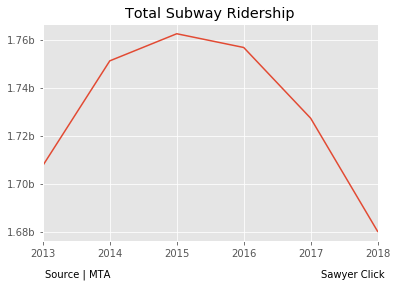

In [54]:
fig = plt.figure()

total = {}
total['index'] = [0]
total['13'] = df['2013'].sum()
total['14'] = df['2014'].sum()
total['15'] = df['2015'].sum()
total['16'] = df['2016'].sum()
total['17'] = df['2017'].sum()
total['18'] = df['2018'].sum()
total = pd.DataFrame(total)
total = total.transpose()
ax = total.tail(6).plot(kind='line', legend=False)
ax.set_title('Total Subway Ridership')
ax.set_yticklabels(['','1.68b','1.70b','1.72b','1.74b','1.76b','1.78b'])
ax.set_xticklabels(['2013','2014','2015','2016','2017','2018'], rotation='horizontal')
plt.figtext(.77,0,"Sawyer Click")
plt.figtext(.13,0,"Source | MTA")

plt.savefig("ugly/linechart_loss_by_year.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

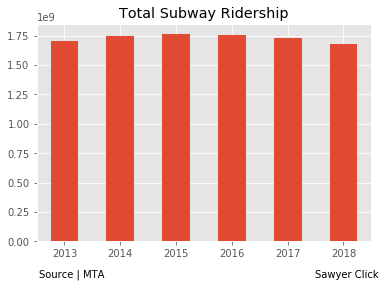

In [53]:
fig = plt.figure()
total = {}
total['index'] = [0]
total['13'] = df['2013'].sum()
total['14'] = df['2014'].sum()
total['15'] = df['2015'].sum()
total['16'] = df['2016'].sum()
total['17'] = df['2017'].sum()
total['18'] = df['2018'].sum()
total = pd.DataFrame(total)
total = total.transpose()
ax = total.tail(6).plot(kind='bar', legend=False)
ax.set_title('Total Subway Ridership')
ax.set_xticklabels(['2013','2014','2015','2016','2017','2018'], rotation='horizontal')
plt.figtext(.77,0,"Sawyer Click")
plt.figtext(.13,0,"Source | MTA")

plt.savefig("ugly/barchart_loss_by_year.png", bbox_inches='tight')

## Change in ridership by year

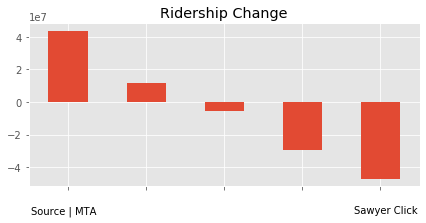

In [52]:
total={}
total['index'] = [0]
total['13-14'] = (df['2014'].sum() - df['2013'].sum())
total['14-15'] = (df['2015'].sum() - df['2014'].sum()) 
total['15-16'] = (df['2016'].sum() - df['2015'].sum())
total['16-17'] = (df['2017'].sum() - df['2016'].sum())
total['17-18'] = (df['2018'].sum() - df['2017'].sum())
total = pd.DataFrame(total)
total = total.transpose()
ax=total.tail(5).plot(kind='bar',legend=False, figsize=(7,3))
ax.set_xticklabels('')
ax.set_title('Ridership Change')
plt.figtext(.77,0,"Sawyer Click")
plt.figtext(.13,0,"Source | MTA")

plt.savefig("ugly/ridership_change.png", bbox_inches='tight')

## Loss by year, grouped into boroughs

Text(0.13, 0, 'Source | MTA')

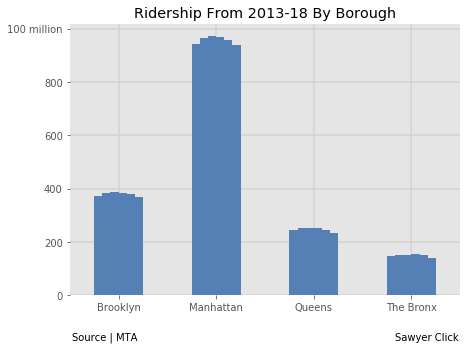

In [51]:
ax = df.groupby('Borough').sum().plot(kind='bar', y=['2013','2014','2015','2016','2017','2018'], figsize=(7, 5), legend=False, color='#5580b6')
ax.set_xlabel('')
ax.set_title('Ridership From 2013-18 By Borough')
ax.set_xticklabels(labels=df.Borough.value_counts().keys(),rotation='horizontal')
ax.set_yticklabels([0,200,400,600,800,'100 million'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(color='lightgray', linestyle='-', linewidth=1.5)
plt.figtext(.77,0,"Sawyer Click")
plt.figtext(.13,0,"Source | MTA")

## Total loss per borough per year

In [8]:
## sum of each borough dataframe
df2={}
df2['borough'] = ['Brooklyn','Manhattan','Queens','The Bronx']
df2['13-14'] = (df.groupby('Borough')['2014'].sum().values - df.groupby('Borough')['2013'].sum().values)
df2['14-15'] = (df.groupby('Borough')['2015'].sum().values - df.groupby('Borough')['2014'].sum().values)
df2['15-16'] = (df.groupby('Borough')['2016'].sum().values - df.groupby('Borough')['2015'].sum().values)
df2['16-17'] = (df.groupby('Borough')['2017'].sum().values - df.groupby('Borough')['2016'].sum().values)
df2['17-18'] = (df.groupby('Borough')['2018'].sum().values - df.groupby('Borough')['2017'].sum().values)
df2 = pd.DataFrame(df2)

def cat_boro(x):
    if x.borough == "Manhattan":
        return 1
    elif x.borough == "Brooklyn":
        return 2
    elif x.borough == "Queens":
        return 3
    else:
        return 4
df2['Borough Category'] = df2.apply(cat_boro, axis=1)

df2 = df2.sort_values('Borough Category')

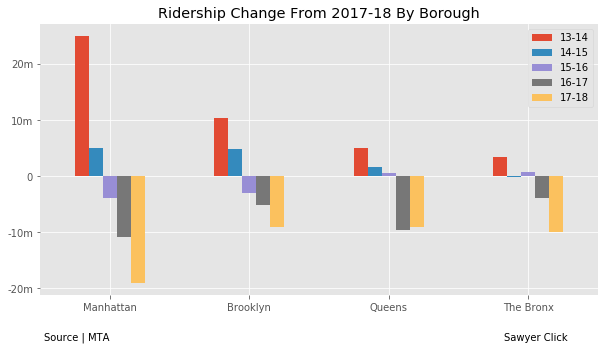

In [50]:
ax = df2.plot(kind='bar', x='borough', y=['13-14','14-15','15-16','16-17','17-18'], figsize=(10,5))
ax.set_xlabel('')
ax.set_yticklabels(['','-20m','-10m','0','10m','20m'])
ax.set_xticklabels(df2.borough, rotation='horizontal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Ridership Change From 2017-18 By Borough')
plt.figtext(.77,0,"Sawyer Click")
plt.figtext(.13,0,"Source | MTA")

plt.savefig("ugly/annual_ridership_by_borough_2.svg", bbox_inches='tight')

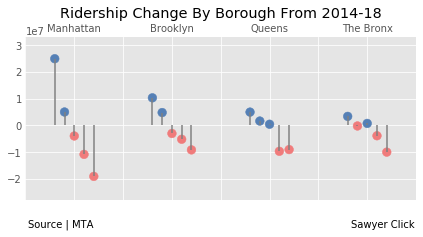

In [55]:
fig, ax = plt.subplots(figsize=(7,3))
ax.set_xlim([-1,7])
ax.set_ylim([-28000000, 33000000])
ax.xaxis.tick_top()
ax.set_xticklabels(['','Manhattan','','Brooklyn','','Queens','','The Bronx'])

def build_colors(x):
    if x['13-14'] < 0 :
        return 'F07B7B'
    else:
        return '5580B6'
colors = df2.reset_index().apply(build_colors, axis=1)
ax.vlines(ymin=0, ymax=df2['13-14'], x=[(0-.4), (2-.4), (4-.4), (6-.4)], color='gray')
legend = [ax.scatter(y=df2['13-14'], x=[(0-.4), (2-.4), (4-.4), (6-.4)], s=75, color=("#"+colors))]

def build_colors(x):
    if x['14-15'] < 0 :
        return 'F07B7B'
    else:
        return '5580B6'
colors = df2.reset_index().apply(build_colors, axis=1)
ax.vlines(ymin=0, ymax=df2['14-15'], x=[(0-.2), (2-.2), (4-.2), (6-.2)], color='gray')
legend = [ax.scatter(y=df2['14-15'], x=[(0-.2), (2-.2), (4-.2), (6-.2)], s=75, color=("#"+colors))]

def build_colors(x):
    if x['15-16'] < 0 :
        return 'F07B7B'
    else:
        return '5580B6'
colors = df2.reset_index().apply(build_colors, axis=1)
ax.vlines(ymin=0, ymax=df2['15-16'], x=[(0), (2), (4), (6)], color='gray')
legend = [ax.scatter(y=df2['15-16'], x=[(0), (2), (4), (6)], s=75, color=("#"+colors))]

def build_colors(x):
    if x['16-17'] < 0 :
        return 'F07B7B'
    else:
        return '5580B6'
colors = df2.reset_index().apply(build_colors, axis=1)
ax.vlines(ymin=df2['16-17'], ymax=0, x=[(0+.2), (2+.2), (4+.2), (6+.2)], color='gray')
legend = [ax.scatter(y=df2['16-17'], x=[(0+.2), (2+.2), (4+.2), (6+.2)], s=75, color=("#"+colors))]

def build_colors(x):
    if x['17-18'] < 0 :
        return 'F07B7B'
    else:
        return '5580B6'
colors = df2.reset_index().apply(build_colors, axis=1)
ax.vlines(ymin=df2['17-18'], ymax=0, x=[(0+.4), (2+.4), (4+.4), (6+.4)], color='gray')
legend = [ax.scatter(y=df2['17-18'], x=[(0+.4), (2+.4), (4+.4), (6+.4)], s=75, color=("#"+colors))]


ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.figtext(.77,0,"Sawyer Click")
plt.figtext(.13,0,"Source | MTA")

ax.set_title('Ridership Change By Borough From 2014-18')

plt.savefig("ugly/annual_drops_by_borough_original.png", bbox_inches='tight')

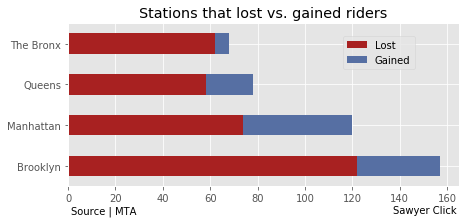

In [57]:
r = [0,1,2,3,4]
stacked_raw = {}
stacked_raw['index'] = [0, 1, 2, 3]
stacked_raw['Gained'] = (df[df['17-18 change'] > 0].groupby('Borough').Station.count())
stacked_raw['Lost'] = (df[df['17-18 change'] < 0].groupby('Borough').Station.count())
stacked = pd.DataFrame(stacked_raw)

ax = stacked.plot(kind='barh', y=['Lost','Gained'], stacked=True, color=['#a82121','#566FA3'], figsize=(7,3))
ax.legend( bbox_to_anchor=(.9, .95))
ax.set_ylabel('')
ax.set_title('Stations that lost vs. gained riders')
plt.figtext(.77,0,"Sawyer Click")
plt.figtext(.13,0,"Source | MTA")
plt.savefig('ugly/lost_vs_gained.png', bbox_inches='tight',transparent=True)

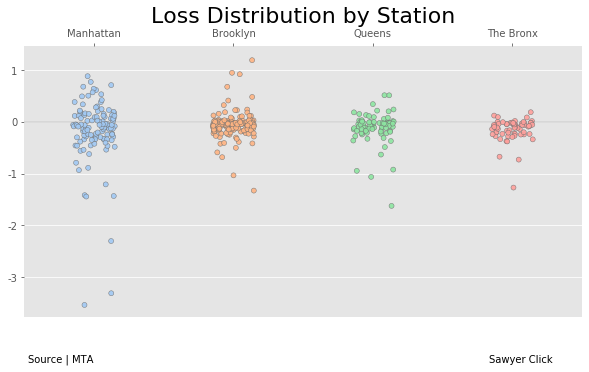

In [60]:
df = pd.read_csv('data/scraped_subway_ridership.csv')

def cat_boro(x):
    if x.Borough == "Manhattan":
        return 1
    elif x.Borough == "Brooklyn":
        return 2
    elif x.Borough == "Queens":
        return 3
    else:
        return 4
df['Borough Category'] = df.apply(cat_boro, axis=1)

fig, ax = plt.subplots(figsize=(10,5), dpi= 72)    

sns.stripplot(df['Borough Category'],df['17-18 change'], jitter=.15, size=5, linewidth=.5, alpha=.9, palette=sns.set_palette('pastel'))
plt.axhline(0, color='lightgray')

plt.title('Loss Distribution by Station', fontsize=22)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(['Manhattan','Brooklyn','Queens','The Bronx'])
ax.xaxis.set_ticks_position('top')
ax.set_yticklabels(['','-3','-2','-1','0','1'])

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.figtext(.77,0,"Sawyer Click")
plt.figtext(.13,0,"Source | MTA")
plt.savefig("ugly/manhattan_fell_the_hardest_original.pdf", bbox_inches='tight')

# Line by line

In [61]:
# group the lines and create a new df

lines = ['1','2','3','4','5','6','7','A','B','C','D','E','F','G','J','L','M','N','Q','R','S','W','Z']
lines_df = []
for line in lines:
    line_one = df[df.lines.str.contains(line)]
    
    count = 13
    for year in range(0,5):
        total = {}
        total['line'] = line
        new = line_one[f"20{count + 1}"].sum()
        old = (line_one[f"20{count}"].sum())
        total['riders'] = ((new - old) / old) * 100
        total['years'] = f"{count}-{count+1}"
        lines_df.append(total)
        count = count + 1
    
lines_df = pd.DataFrame(lines_df)

# Lines w/ ridership growth

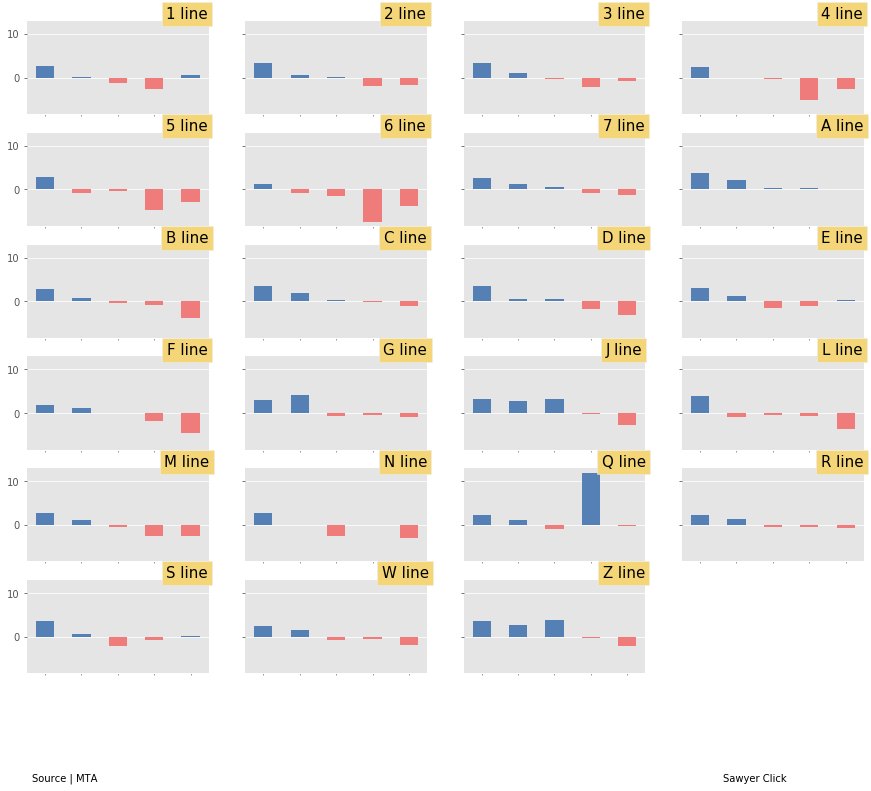

In [62]:
## Working template

## filter
positive = ['1','2','3','4','5','6','7','A','B','C','D','E','F','G','J','L','M','N','Q','R','S','W','Z']

## For small multiple
fig, axes = plt.subplots(nrows=6, ncols=4, sharex=True, sharey=True, figsize=(15,12))
axes_list = [item for sublist in axes for item in sublist] 

for line in positive:
    ax = axes_list.pop(0)
    
    def build_colors(x):
        if x.riders < 0:
            return 'F07B7B'#red
        else:
            return '5580B6'#blue
    colors = lines_df[lines_df.line == line].reset_index().apply(build_colors, axis=1)
    
    ax=lines_df[lines_df.line == line].plot(kind='bar',x='years',y='riders', color="#"+colors, ax=ax,legend=False)
    
    ax.text(3.9, 14.5, f"{line} line", size=15,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   fc=('#F4D678'),
                   )
         )
    
    plt.xticks([],[])
    ax.set_xlabel("")
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()
    
    plt.figtext(.77,0,"Sawyer Click")
    plt.figtext(.13,0,"Source | MTA")
    
plt.savefig("ugly/17_18_ridership_all_lines.png", bbox_inches='tight')

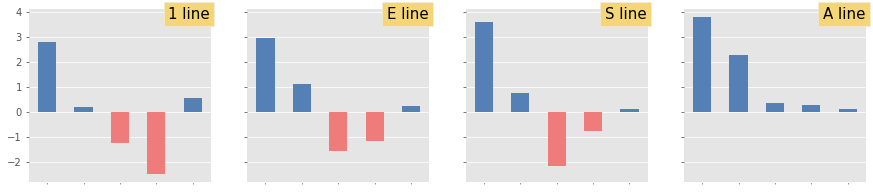

In [63]:
## Working template

## FILTER
positive = lines_df[(lines_df.years == "17-18") & (lines_df.riders > 0)].sort_values('riders', ascending=False).line

## For small multiple
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(15,7))
axes_list = [item for sublist in axes for item in sublist] 

for line in positive:
    ax = axes_list.pop(0)
    
    def build_colors(x):
        if x.riders < 0:
            return 'F07B7B'#red
        else:
            return '5580B6'#blue
    colors = lines_df[lines_df.line == line].reset_index().apply(build_colors, axis=1)
    
    ax=lines_df[lines_df.line == line].plot(kind='bar',x='years',y='riders', color="#"+colors, ax=ax,legend=False)
    
    ax.text(3.9, 3.9, f"{line} line", size=15,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   fc=('#F4D678'),
                   )
         )
    plt.xticks([],[])
    
    ax.set_xlabel("")
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()
    
plt.savefig("ugly/17_18_ridership_gain.png", bbox_inches='tight')

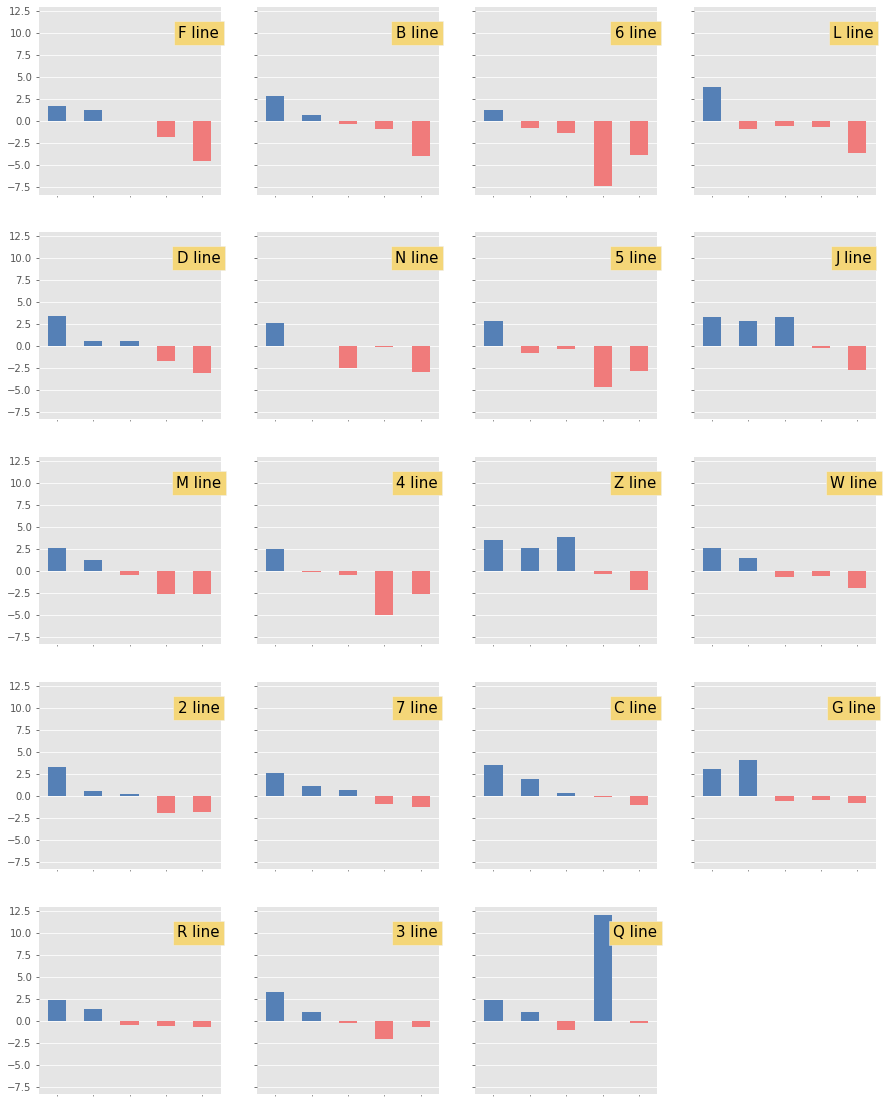

In [64]:
## Working template

## FILTER
negative = lines_df[((lines_df.years =="17-18") & (lines_df.riders < 0))].sort_values('riders').line

## For small multiple
fig, axes = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

for line in negative:
    ax = axes_list.pop(0)
    
    def build_colors(x):
        if x.riders < 0:
            return 'F07B7B'#red
        else:
            return '5580B6'#blue
    colors = lines_df[lines_df.line == line].reset_index().apply(build_colors, axis=1)
    
    ax=lines_df[lines_df.line == line].plot(kind='bar',x='years',y='riders', color="#"+colors, ax=ax,legend=False)
    
    ax.text(3.9, 10, f"{line} line", size=15,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   fc=('#F4D678'),
                   )
         )
    plt.xticks([],[])
    
    ax.set_xlabel("")
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()
    
plt.savefig("ugly/17_18_ridership_loss_all.png", bbox_inches='tight')

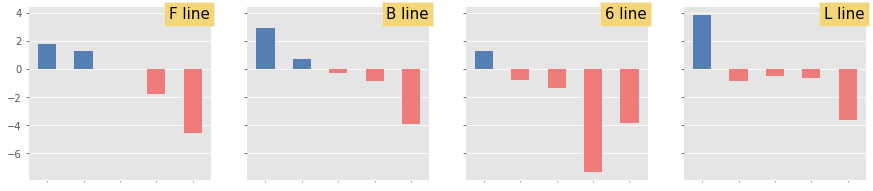

In [65]:
## Working template

## FILTER
negative = lines_df[(lines_df.years == "17-18") & (lines_df.riders < 0)].sort_values('riders').head(4).line

## For small multiple
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(15,7))
axes_list = [item for sublist in axes for item in sublist] 

for line in negative:
    ax = axes_list.pop(0)
    
    def build_colors(x):
        if x.riders < 0:
            return 'F07B7B'#red
        else:
            return '5580B6'#blue
    colors = lines_df[lines_df.line == line].reset_index().apply(build_colors, axis=1)
    
    ax=lines_df[lines_df.line == line].plot(kind='bar',x='years',y='riders', color="#"+colors, ax=ax,legend=False)
    
    ax.text(3.9, 3.9, f"{line} line", size=15,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   fc=('#F4D678'),
                   )
         )
    plt.xticks([],[])
#     plt.yticks([],[])
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    ax.set_xlabel("")
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()
    
plt.savefig("ugly/17_18_ridership_loss_top_4.png", bbox_inches='tight')